In [ ]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

In [5]:
import pandas as pd

### 1. wages (12월 05일)
wages = pd.read_csv('Tranning\eda_data_files\wages.csv')

# Team 별로 point의 총합을 구하시오
wages.groupby('Team')['Points'].sum()
# 연도별 최고 점수...
wages.groupby('Year')['Points'].max()
# Team별 데이터 수
wages.groupby('Team').count()

In [6]:

### 2. phone_data (12월 05일)
phone = pd.read_csv('Tranning\eda_data_files\phone_data.csv')

# item 별 통화시간의 합
phone.groupby('item')['duration'].sum()
# network별 평균 사용시간
phone.groupby('network')['duration'].mean()
# 연도를 제외한 월별 평균사용시간
phone.date.dropna()
# item별 시간대별 총 사용시간
phone.groupby('item')['duration'].sum()
# network별 평균 사용시간
phone.groupby('network')['duration'].mean()
# 연도를 제외한 월별 평균사용시간
phone.month.apply(lambda x : x.split('-')[1])
phone['sub_mon'] = phone.month.apply(lambda x : x.split('-')[1])

# item별 시간대별 총 사용시간
phone['sub_time'] = phone.date.apply(lambda x : x.split()[1].split(':')[0])
phone.groupby('sub_time')['duration'].sum()

sub_time
00      236.00
01        9.00
02      283.00
06     5177.35
07       23.00
08     1972.00
09     3646.00
10     2792.00
11     4427.00
12    12849.00
13     7877.00
14     5380.00
15     8307.00
16     9953.00
17     7715.00
18     9744.00
19     9214.00
20     5479.00
21     1584.00
22       66.00
23     1044.00
Name: duration, dtype: float64

In [4]:

### 3. Salaries1 (12월 05일)
sal = pd.read_csv('Tranning\eda_data_files\Salaries1.csv')

# 1. BasePay 평균은?
print('BasePay 평균 : ', sal['BasePay'].mean())

# 2. OvertimePay의 최대값은?
print('OvertimePay의 평균 : ', sal['OvertimePay'].max())

# 3. 'JOSEPH DRISCOLL'의 직업은?
print('직업 : ', list(sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL'].JobTitle)[0])

# 4. 'TotalPayBenefits' 최고금액을 수령하는 사람의 이름은?
print('최고 금액 수령 인물 : ', list(sal[sal.TotalPayBenefits.max() == sal.TotalPayBenefits].EmployeeName)[0])

# 5. 연도별 BasePay의 평균 TotalPay는?
for i in range(len(list(sal.Year.unique()))):
    print(list(sal.Year.unique())[i], '년도 : ' ,  list(sal.groupby('Year')['BasePay'].mean())[i])

# 6. 'JobTitle'의 종류는?  [ 다른 풀이방법을 알아야 함]
jobList = sal.JobTitle.unique()
# 7. 'JobTitle'의 종류 중 가장 많은 jobTitle 상위 5개는 무엇인가?
sal.groupby('JobTitle')["EmployeeName"].count().sort_values(ascending=False).head(5)

# 8. 2011년도에 오직 한 사람만 종사하고 있는 jobTitle은?
jobList = sal[sal['Year'] == 2011]['JobTitle']
unique_counts = jobList.value_counts()
unique_counts[unique_counts == 1]

# 9. 'Chief'라는 직업을 가진 사람의 수는?
sal[sal['JobTitle'].str.contains('CHIEF')].EmployeeName.count()

# 10. 'TotalPay'의 10%가 세금이라고 할 때, 세금을 계산한 'Tax' 칼럼을 추가하시오
sal['Tax'] = sal.TotalPay.apply(lambda x : x * 0.1)
sal

# 11. Agency 별로 몇 개의 데이터가 존재하는가.
sal.groupby('Agency').count()




BasePay 평균 :  75601.1371462
OvertimePay의 평균 :  245131.88
직업 :  CAPTAIN, FIRE SUPPRESSION
최고 금액 수령 인물 :  NATHANIEL FORD
2011 년도 :  63595.95651677314
2012 년도 :  106964.14028032655


,Unnamed: 0,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status,Tax
Agency,,,,,,,,,,,,,,
San Francisco,50000,50000,50000,50000,50000,50000,50000,13841,50000,50000,50000,0,0,50000


In [ ]:
### 4. Weather (12월 06일)
weather = pd.read_csv('Tranning\eda_data_files\seoul_weather.csv', skiprows=8, encoding='euckr')

weather1 = weather[['일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']]
weather1.columns = ['일시','평온','고온','저온']
weather1['평온'] = weather1.평온.astype('str')


In [ ]:
### 5. CCTV (12월 06일)

# CSV 파일
import numpy as np
import pandas as pd

cctv = pd.read_csv('Tranning\eda_data_files\CCTV_in_Seoul.csv')
people = pd.read_excel('Tranning\eda_data_files\population_in_Seoul.xls')

people.columns = ['기간','자치구','세대','총인구','총남자수','총여자수','한국인인구','한국인남자','한국인여자','외국인인구','외국인남자','외국인여자','세대당인구','65세고령자']
cctv.columns = ['자치구','CCTV개수','2013년도이전','2014년','2015년','2016년']

peopleCCTV = pd.merge(people, cctv, on='자치구', how='outer')
peopleCCTV.drop([0,1,2],inplace=True)
peopleCCTV['총인구'] = pd.to_numeric(peopleCCTV['총인구'], errors='coerce')
peopleCCTV['총남자수'] = pd.to_numeric(peopleCCTV['총남자수'], errors='coerce')
peopleCCTV['총여자수'] = pd.to_numeric(peopleCCTV['총여자수'], errors='coerce')
peopleCCTV['한국인인구'] = pd.to_numeric(peopleCCTV['한국인인구'], errors='coerce')
peopleCCTV['한국인남자'] = pd.to_numeric(peopleCCTV['한국인남자'], errors='coerce')
peopleCCTV['한국인여자'] = pd.to_numeric(peopleCCTV['한국인여자'], errors='coerce')
peopleCCTV['외국인인구'] = pd.to_numeric(peopleCCTV['외국인인구'], errors='coerce')
peopleCCTV['외국인남자'] = pd.to_numeric(peopleCCTV['외국인남자'], errors='coerce')
peopleCCTV['외국인여자'] = pd.to_numeric(peopleCCTV['외국인여자'], errors='coerce')
peopleCCTV['세대당인구'] = pd.to_numeric(peopleCCTV['세대당인구'], errors='coerce')
peopleCCTV['65세고령자'] = pd.to_numeric(peopleCCTV['65세고령자'], errors='coerce')
peopleCCTV['한국인남자'] = pd.to_numeric(peopleCCTV['한국인남자'], errors='coerce')
peopleCCTV['65세고령자'] = pd.to_numeric(peopleCCTV['65세고령자'], errors='coerce')

peopleCCTV.reset_index(drop=True,inplace=True)

# 인구당 cctv수가 많은 구....
peopleCCTV['CCTV비율'] = peopleCCTV['총인구'] / peopleCCTV['CCTV개수']
peopleCCTV.sort_values('CCTV비율', ascending=False)[['자치구', 'CCTV비율']]

# CCTV가 가장 많은 구?>
peopleCCTV.sort_values('CCTV개수', ascending=False)[['자치구','CCTV개수']]

# 2016년에 CCTV증가율이 가장 높은 구는?
peopleCCTV['CCTV증가율'] = (peopleCCTV['2016년'] - peopleCCTV['2015년']) / peopleCCTV['2015년'] * 100
peopleCCTV.sort_values('CCTV증가율', ascending=False)[['자치구', 'CCTV증가율']].head(5)

# 외국인 비율이 가장 높은 구는?
peopleCCTV['외국인비율'] = peopleCCTV['외국인인구'] / peopleCCTV['총인구']
peopleCCTV.sort_values('외국인비율', ascending=False)[['자치구', '외국인비율']].head(5)

# 고령자 비율이 가장 높은 구는?
peopleCCTV['고령자비율'] = peopleCCTV['65세고령자'] / peopleCCTV['총인구']
peopleCCTV.sort_values('외국인비율', ascending=False)[['자치구', '고령자비율']].head(5)

# 전체 인구수가 가장 많은 구는?
peopleCCTV.sort_values('총인구', ascending=False)[['자치구', '총인구']].head(5)


In [ ]:
### 6. naver 광고 (12월 07일)

ad_data = pd.read_csv("Tranning\eda_data_files\\naver_ad.csv")

ad_data = ad_data.loc[ad_data['키워드'] != '-']
ad_data.reset_index(drop=True)

# 노출수 = 사람들에게 광고가 보여지는 횟수
# 클릭률 = 노출수 대비 클릭한 숫자
# 클릭비용(CPC) 클릭당 지출 비용...

# 중점적으로 관리할 키워드를 추출 : 노출수가 높은 키워드, 클릭수가 높은 키워드, 클릭률이 높은 키워드, 클릭비용이 낮은 키워드
# 상위 20%를 추출하시오

# 노출수가 높은 키워드 
express_keyword = ad_data.sort_values('노출수',ascending=False).head(int(len(ad_data) * 0.1))[['키워드', '노출수']]
express_keyword.reset_index(drop=True)

# 클릭수가 높은 키워드 
click_keyword = ad_data.sort_values('클릭수',ascending=False).head(int(ad_data['키워드'].count() * 0.1))[['키워드', '클릭수']]
click_keyword.reset_index(drop=True)

# 클릭률이 높은 키워드 
ad_data['클릭률'] = ad_data['클릭수'] / ad_data['노출수']
click_rate_keyword = ad_data.sort_values('클릭률',ascending=False).head(int(ad_data['키워드'].count() * 0.1))[['키워드','클릭률']]
click_rate_keyword.reset_index(drop=True)

# 클릭비용이 낮은 키워드
ad_data['클릭비용(cpc)'] = ad_data['총비용(VAT포함,원)'] / ad_data['클릭수']
click_cost_keyword = ad_data.sort_values('클릭비용(cpc)',ascending=False).head(int(ad_data['키워드'].count() * 0.1))[['키워드','클릭비용(cpc)']]
click_cost_keyword.reset_index(drop=True)


감독
크리스 벅,제니퍼 리   82461504400.0
이상근           79142136162.0
이일형           77252755264.0
Name: 매출액, dtype: float64

C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\G

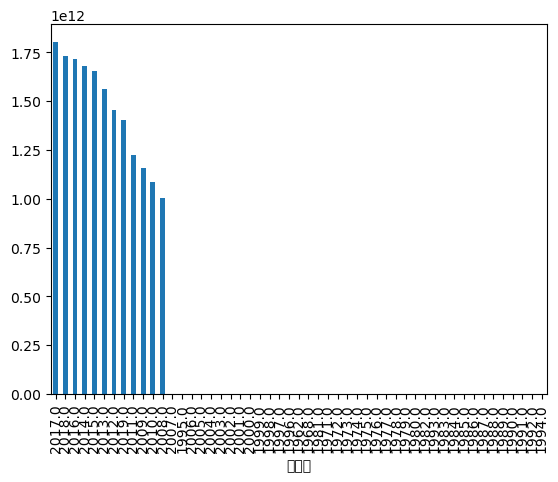

In [9]:
### 7. 영화 (12월 07일)

pd.options.display.float_format = '{:.1f}'.format

kobis = pd.read_csv('Tranning\eda_data_files\KOBIS_개봉일람_2019-10-26.csv',skiprows=5)

kobis.columns = ['순번','영화명','감독','제작사','수입사','배급사','개봉일','영화유형','영화형태','국적','전국스크린수','매출액','관객수','서울매출액','서울관객수','장르','등급','영화구분']
kobis.drop([0], inplace=True)

kobis['개봉일'] = pd.to_datetime(kobis['개봉일'])
kobis['개봉년'] = kobis['개봉일'].dt.year
kobis['개봉달'] = kobis['개봉일'].dt.month

#kobis['전국스크린수'] = kobis['전국스크린수'].apply(lambda x : x.replace(',','')).astype('int32')
kobis['순번'] = kobis['전국스크린수'].str.replace(',','').astype('int32')
kobis['전국스크린수'] = kobis['전국스크린수'].str.replace(',','').astype('int32')
kobis['매출액'] = kobis['매출액'].dropna().str.replace(',','').astype('int64')
kobis['관객수'] = kobis['관객수'].dropna().str.replace(',','').astype('int64')
kobis['서울매출액'] = kobis['서울매출액'].dropna().str.replace(',','').astype('int64')
kobis['서울관객수'] = kobis['서울관객수'].dropna().str.replace(',','').astype('int64')

# http://www.kobis.or.kr

# 매출액이 사상 최대인 영화는?
kobis[kobis['매출액'].max() == kobis['매출액']]['영화명']
kobis.sort_values('매출액',ascending=False).iloc[0]

# 국가별 영화 매출액 순위..?

kobis_ranking = kobis.groupby(['국적'])['매출액'].mean().sort_values(ascending=False)
kobis_ranking.reset_index(drop=True)

kobis_ranking.head(5)
kobis.groupby('국적')['매출액'].mean().sort_values(ascending=False)


# 연도별 영화 매출합..?
temp = kobis.groupby(kobis['개봉년'])['매출액'].sum().sort_values(ascending=False)
temp.plot(kind='bar')

# 장르별 매출액 합의 상위 5개 장르..?
temp = kobis.groupby(kobis['장르'])['매출액'].sum().sort_values(ascending=False)
temp.head(5)

# 장르별 평균 매출액 상위 5개 장르..?
temp = kobis.groupby(kobis['장르'])['매출액'].mean().sort_values(ascending=False)
temp.iloc[:5]

# 장르별 평균 매출액 하위 5개 장르..?
temp = kobis.groupby(kobis['장르'])['매출액'].mean().sort_values(ascending=True)
temp.iloc[:5]

# 평균 매출액이 높은 감독, 낮은 감독..? 각각 상위 , 하위 3명
temp = kobis.groupby(kobis['감독'])['매출액'].mean().sort_values(ascending=False)
temp.iloc[:3]

# 평균 매출액이 높은 감독, 낮은 감독..? 각각 상위 , 하위 3명
temp = kobis.groupby('감독')['매출액'].mean().sort_values(ascending=False)
temp.iloc[-3:]

# 평균 매출액이 가장 높은 달은?
temp = kobis.groupby(kobis['개봉달'])['매출액'].mean().sort_values(ascending=False).plot(kind='bar')
temp.iloc[:1]



In [12]:
### 7. 인구 (12월 07일)

age_pd = pd.read_csv('Tranning\eda_data_files\\age_pd.csv',encoding='euckr')

age_pd = age_pd.rename(columns={'2019년02월_계_총인구수':'총인구수', '2019년02월_계_연령구간인구수':'연령구간'})

# columns 이름 바꾸기
for age in range(101):
    age_pd = age_pd.rename(columns={'2019년02월_계_{}세'.format(age) : '{}세'.format(age)})

age_pd = age_pd.rename(columns={'2019년02월_계_100세 이상' : '100세 이상'})


for col in age_pd.columns[1:]:
    try:
        age_pd[col] = age_pd[col].str.replace(',','').astype('int64')
    except:
        pass
    

for age in range(0,99,10):
    age_li = []
    
    for i in range(age , age+10):
        age_li.append('{}세'.format(i))
        
    age_pd['{}대합산'.format(age)] = age_pd[age_li].sum(axis='columns')
    age_li.clear()
    
age_li.append('100세 이상')
age_pd['100대합산'.format(age)] = age_pd[age_li].sum(axis='columns')
age_li.clear()

all_seoul = age_pd.iloc[0]
age_pd.drop([0], axis=0, inplace= True)
age_pd['자치구'] = age_pd['행정구역'].apply(lambda x : x.split()[1])

age_pd['행정구역'] = age_pd['자치구']
age_pd = age_pd.drop('자치구',axis=1)


age_pd.head(5)

# 1. 구를 입력받은 후, 해당 구의 연령대별 인구분포를 출력하시오..
borough = input()

age_pd[age_pd['자치구'] == borough]

#2. 구와 연령을 입력받은 후, 해당 구의 해당 연령의 인구수를 출력하시오..
borough = input()
age = input()

age_pd[age_pd['자치구'] == borough][['자치구','{}세'.format(age)]]

#3. 연령을 입력받은 후 해당 연령의 인구가 가장 많은 구를 출력하시오..
age = 23

age_pd.sort_values('{}세'.format(age),ascending=False)['자치구'].iloc[:5]

#4. 인구수가 가장 많은 구는...?
age_pd.sort_values('총인구수',ascending=False)['자치구'].iloc[:1]

#5. 연령대(10대,20대,..50대..100세이상)를 입력받은 후 해당 연령대 인구수가 가장 많은 구를 출력..
age = 10
age_pd[age_pd['{}대합산'.format(age)].max() == age_pd['{}대합산'.format(age)]][['자치구','{}대합산'.format(age)]]

#6. 구를 입력받은 후 해당 구와 연령대별 인구분포가 가장 유사한 구를 출력하시오..
borough = '강동구'

new_pd = age_pd.T

header = new_pd.iloc[0]
new_pd = new_pd[3:]

new_pd.rename(columns=header,inplace=True)
new_pd.corr()[borough].sort_values(ascending=False).index[1]

#7. 서울시에서 인구수가 가장 많은 연령은..?
all_seoul[3:].sort_values(ascending=False)[:1]

#8. 서울시에서 인구수가 가장 많은 연령대(10대,20대,..50대..100세이상)는..?

sum_li = ['10대합산','20대합산','30대합산','40대합산','50대합산','60대합산','70대합산','80대합산','90대합산','100대합산']

temp_data = pd.DataFrame(age_pd[sum_li].sum())
temp_data.columns = ['결과'] 
temp_data.index = ['10대','20대','30대','40대','50대','60대','70대','80대','90대','100대']
temp_data
temp_data.sort_values('결과',ascending=False).iloc[:1]

In [ ]:
# 8. 상가업소 (12월 08일)

import pandas as pd
import numpy as np
import seaborn as sns       # 시각화 패키지
import matplotlib.pyplot as plt

# matplotlib 한글 안깨지게 하는 코드
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\Windows\Fonts\HMKMMAG.TTF'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

df = pd.read_csv('Tranning\eda_data_files\상가업소정보_201912_01.csv',sep='|')
df.head(2)

# 대업종 빈도수.. 
df['상권업종대분류명'].value_counts()

# 강남구에 음식업체만 추출...
df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')]
df_seoul_food = df[(df['상권업종대분류명'] == '음식') & (df['시도명'] == '서울특별시')]

# 서울시의 음식업종 중에서 구별, 중분류업종수를 출력...
df_seoul_food.groupby(['시군구명','상권업종중분류명']).count()['상호명']

food_gu = df_seoul_food.groupby(['시군구명','상권업종중분류명']).count()['상호명'].unstack()
food_gu.loc['강동구'].plot(kind='bar')

# 입시학원이 어느 구에 많이 분포하는지 확인...
df_seoul_edu = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '학문/교육')]

df_seoul_edu['상권업종소분류명'].unique()

df_seoul_edu_ibsi = df_seoul_edu[df_seoul_edu['상권업종소분류명'].str.contains('학원-입시')]
df_seoul_edu_ibsi['시군구명'].value_counts().head(30).plot(kind='bar')

plt.figure(figsize=(19,12))
sns.scatterplot(data=df_seoul_edu_ibsi, x='경도', y='위도', hue='시군구명')

# 서울시 학원에서 어떤 종류의 학원이 많은지 상위 10개의 교육업종

df_seoul_edu['상권업종소분류명'].value_counts().head(10)

# 교육 상위 10개의 소업종 데이터만 추출...
df_edu_sample = df_seoul_edu.groupby('상권업종소분류명')

In [14]:
### 9. 지하철 (12월 08일)

subway = pd.read_csv('Tranning\eda_data_files\subwaytime.csv',encoding='euckr')


# 출근 7시 ~ 9시
# 퇴근 오후 6시 - 9시

subway.columns = ['사용월', '호선명', '역ID', '지하철역', '04승차', '04하차',
       '05승차', '05하차', '06승차', '06하차',
       '07승차', '07하차', '08승차', '08하차',
       '09승차', '09하차', '10승차', '10하차',
       '11승차', '11하차', '12승차', '12하차',
       '13승차', '13하차', '14승차', '14하차',
       '15승차', '15하차', '16승차', '16하차',
       '17승차', '17하차', '18승차', '18하차',
       '19승차', '19하차', '20승차', '20하차',
       '21승차', '21하차', '22승차', '22하차',
       '23승차', '23하차', '00승차', '00하차',
       '01승차', '01하차', '02승차', '02하차',
       '03승차', '03하차']

subway.drop([0],inplace=True)

# 타입캐스팅
for col in subway.columns[4:]:
       subway[col] = subway[col].astype('int64')

sub_subway = subway.copy()
sub_subway.drop(columns=sub_subway.columns[4:],inplace=True)

temp_pd = pd.Series(subway.columns)
temp_pd = temp_pd[temp_pd.str.contains('승차')]

sub_subway['승차합'] = subway[temp_pd].sum(axis=1)

temp_pd = pd.Series(subway.columns)
temp_pd = temp_pd[temp_pd.str.contains('하차')]

sub_subway['하차합'] = subway[temp_pd].sum(axis=1)

sub_subway['이용객'] = sub_subway['승차합'] + sub_subway['하차합'] 

#subway_filter['총하차']

gowork_enter = ['07승차','08승차','09승차']
gowork_exit = ['07하차','08하차','09하차']

outwork_enter = ['18승차','19승차','20승차','21승차']
outwork_exit = ['18하차','19하차','20하차','21하차']

sub_subway['출근승차'] = subway[gowork_enter].sum(axis=1)
sub_subway['출근하차'] = subway[gowork_exit].sum(axis=1)
sub_subway['퇴근승차'] = subway[outwork_enter].sum(axis=1)
sub_subway['퇴근하차'] = subway[outwork_exit].sum(axis=1)
sub_subway

# 하차인원이 가장 많은 역은
sub_subway[sub_subway['하차합'].max() == sub_subway['하차합']]['지하철역']

# 이용객이 가장 많은 역은 상위 5개
sub_subway.sort_values('이용객',ascending=False)[:5]['지하철역']

# 출근시간에 승차를 가장 많이 하는 역, 하차를 많이 하는 역은
sub_subway.sort_values('출근승차',ascending=False)[:5]['지하철역']
sub_subway.sort_values('출근하차',ascending=False)[:5]['지하철역']

# 퇴근시간에 승차를 가장 많이 하는 역, 하차를 많이 하는 역은
sub_subway.sort_values('퇴근승차',ascending=False)[:5]['지하철역']

# 역이름을 입력받은 후 시간대별 승차인원과 하차인원을 구하시오
subway.loc[subway['지하철역'] == '강남']

temp_pd = pd.Series(subway.columns)
temp_pd = temp_pd[temp_pd.str.contains('승차')]

subway[temp_pd]

# 시간을 입력받은 후 해당 시간에 이용객이 가장 많은 역

#1
select_time = '06'

temp_data = pd.DataFrame()

temp_data['지하철역'] = subway['지하철역']
temp_data['시간대합산'] = subway[f'{select_time}승차'] + subway[f'{select_time}하차']

temp_data['4.19민주묘지' == temp_data['지하철역']]
#temp_data = temp_data.sort_values('시간대합산',ascending=False)
#temp_data.head(1)

#2
# 강사님 답안
#subway.iloc[subway.loc[:, '06승차':'06하차'].sum(axis=1).sort_values().index[-1] - 1]['지하철역']
#subway.loc[:, '06승차':'06하차'].sum(axis=1).sort_values().index[-1]['지하철역']

#3 합산
temp_sub_data = subway.groupby('지하철역')[['06승차','06하차']].sum()
temp_sub_data.sum(axis=1).sort_values(ascending=False).index[0]


In [ ]:
# 10. 날씨 (12월 11일)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Tranning\eda_data_files\seoul_weather.csv',skiprows=9,encoding='cp949')


# 실행시킬 ipynb 파일과 같은 경로에 csv 파일을 놓는다.
# pd.read_csv('파일명', skiprows = 9 , encoding='cp949')
# skiprows : 스킵할 행을 의미한다.
# encoding : cp949, euckr , utf8 중에 하나가 설정된다.


df.drop(df.columns[0:2],axis=1,inplace=True)
#df.isnull().sum()
#df.isnull().sum()/len(df)
df.drop(['\t최고기온시각', '최저기온시각'],axis=1,inplace=True)
df.columns = ['일시', '평온','고온','저온']

# 일교차 값 넣기
df['일교차'] = df['고온'] - df['저온']
df['연'] = df['일시'].apply(lambda x : x.split('-')[0])
df['달'] = df['일시'].apply(lambda x : x.split('-')[1])
df['일'] = df['일시'].apply(lambda x : x.split('-')[2])

df.set_index('일시',inplace=True)

df.head(5)

# 일교차 가장 큰 날
df[df['일교차'].max() == df['일교차']]

# 일교차 가장 큰 달
df.groupby('달')['일교차'].sum().sort_values(ascending=False).dropna().index[0]

# 가장 더운 해
df.groupby('연')['고온'].mean().sort_values(ascending=False).dropna().index[0]
# 가장 더운 월
df.groupby('달')['고온'].mean().sort_values(ascending=False).dropna().index[0]
# 가장 더운 날
df.groupby('일')['고온'].mean().sort_values(ascending=False).dropna().index[0]
# 역대 최고 기온
df[df['고온'].max() == df['고온']][['일시','고온']]

# 가장 추운 해
df.groupby('연')['저온'].mean().sort_values(ascending=True).dropna().index[0]
# 가장 추운 월
df.groupby('달')['저온'].mean().sort_values(ascending=True).dropna().index[0]
# 가장 추운 날
df.groupby('일')['저온'].mean().sort_values(ascending=True).dropna().index[0]
# 역대 최저 기온 
df[df['저온'].max() == df['저온']][['일시','저온']]
# 연도별 평균기온 추이
df.groupby('연')['평온'].mean().sort_values(ascending=True).dropna().index[0]

df.groupby('연')['평온'].mean().plot(figsize=(5,3))

In [ ]:
# 11. 가격 (12월 11일)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\Backup\eda_data_files\OnlineRetail.csv')
df.head(5)

df.isnull().sum()
df['CustomerID'].notnull()  # null 이 아닌게 True
df['CustomerID'].isnull()   # null 인 것만 True

df1 = df[pd.notnull(df['CustomerID'])]
df1.isnull().sum()
df1.head(2)

df1[df1['UnitPrice'] != 0]
df1.head(3)

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['CheckoutPrice'] = df1['Quantity'] * df1['UnitPrice']
df1

# 국가별 매출
df1.groupby('Country')['CheckoutPrice'].sum().sort_values(ascending=False)

# 월별 매출
df1.groupby(df1['InvoiceDate'].dt.month)['CheckoutPrice'].sum().sort_values(ascending=False)

# 매출 10대 상품
df1[['CheckoutPrice','Description']].sort_values('CheckoutPrice',ascending=False).head(10)

df1.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False).iloc[:10]

#df1['mon'] = df1['InvoiceDate'].astype('str').apply(lambda x : x.split('-')[:2])
df1['mon'] = df1['InvoiceDate'].astype('str').apply(lambda x : x[:7])

# 매출 상위 5대 상품의 월별 판매추이
#head_description = df1[['CheckoutPrice','Description']].sort_values('CheckoutPrice',ascending=False).head(5)['Description']
top5codes = df1.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False).iloc[:5].index
top5codes_df1 = df1[df1['StockCode'].isin(top5codes)]

top5codes_df1.groupby(['StockCode','mon'])['CheckoutPrice'].sum().unstack().T.plot(figsize=(15,10))

# cohort 분석

# 동질적인 집단을 묶어서 집단별로 분석...
# 월별 처음 구매한 고객인 얼마나 지속적으로 구매를 하는가...
# 서로 다른 집단간의 시간에 따른 변화를 관찰, 분석...



df = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\Backup\eda_data_files\OnlineRetail.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# 날짜 
df['month'] = df['InvoiceDate'].apply(lambda x : datetime(x.year, x.month, 1))

#def get_month_asdatetime(date):
 
# 최초 구매월을 칼럼에 추가...
#df.groupby('CustomerID')['month'].min()
#df['monthstarted'] = datetime(1900,1,1)
#df.head(3)

df.dropna(inplace=True)
df.head(3)

grouped = df.groupby('CustomerID')['month'].min()
grouped.index = grouped.index.astype('str')
grouped.head()

# 최초 구매 넣기
temp = []
for cid in df.CustomerID:
  fm = grouped.loc[str(cid)]
  temp.append(fm)
#  print(cid, fm)
temp

df['monthstarted'] = temp
df.head(3)

# 구매상태 확인
df['monthpassed'] = (df['month'].dt.year - df['monthstarted'].dt.year)*12 + (df['month'].dt.month - df['monthstarted'].dt.month)

df.head(3)

cohort_group = df.groupby(['monthstarted', 'monthpassed'])

def get_unique_no(x):
    return len(np.unique(x))

customer_cohort = cohort_group['CustomerID'].agg(get_unique_no).unstack()
customer_cohort

customer_cohort.div(customer_cohort[0], axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

공원보유시설(운동시설)
게이트볼장, 농구장                                                                                  6
베드민턴장 등                                                                                     6
체력단련시설,농구대                                                                                  6
마사지롤라, 트위스트, 캥거루허리돌리기+흔들코끼리, 사자스텝퍼+오리다리펴기, 오리다리펴기+흔들코끼리, 에어워킹, 노르딕머신, 워밍쇼울더, 에어서핑, 레그프레스    6
체력단련시설5                                                                                     6
                                                                                           ..
오팔펴기 외 19종                                                                                  1
양팔줄당기기외 10종                                                                                 1
온몸노젓기외 4종                                                                                   1
온몸근육풀기외 2종                                                                                  1
플웨이트, 스텝사이클, 크라임스템퍼                            

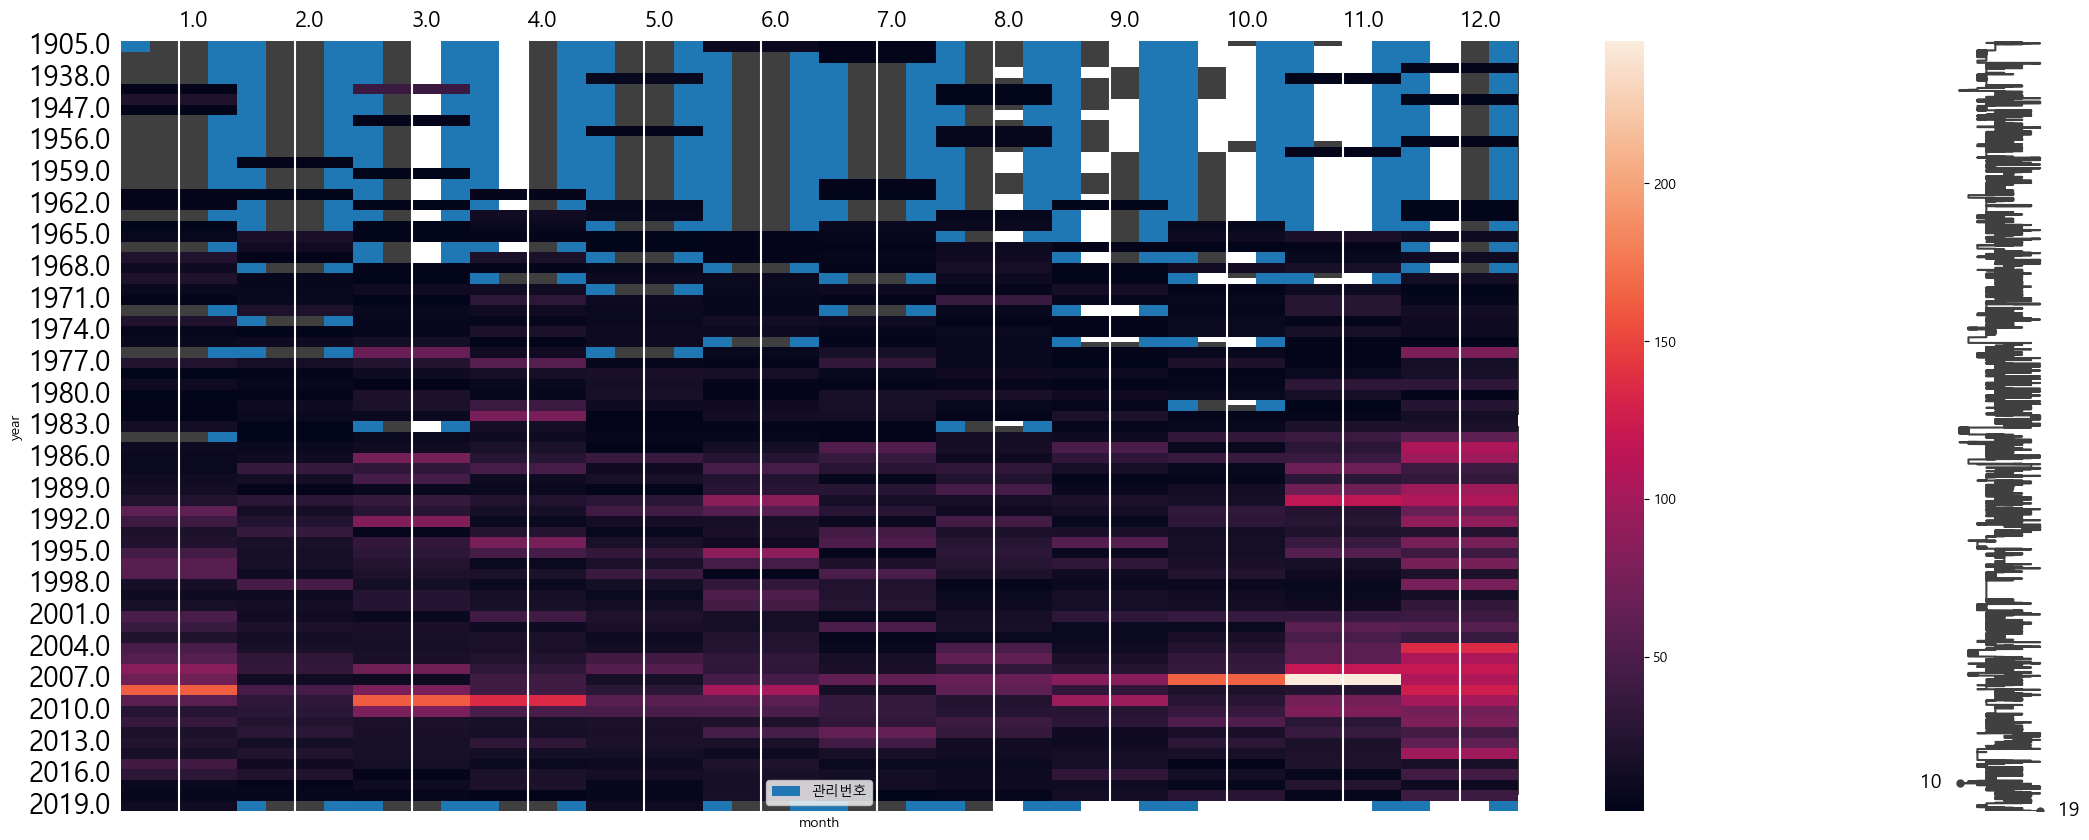

In [3]:
# 12. 전국도시공원표준데이터 (12월 12일)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Tranning\eda_data_files\전국도시공원표준데이터.csv', encoding='euckr')
df.head(3)

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

# 전국의 공원데이터에 설치된 시설의 종류, 종류별 설치 댓수를 파악...
df.info()
df.head(5)

import missingno
missingno.matrix(df)

df[['소재지도로명주소','소재지지번주소']].isnull().sum()
df[['소재지도로명주소','소재지지번주소']].isnull().sum(axis=1).max() # 둘 중 하나는 값이 있다.

# 도로명 주소의 nan값을 지번주소로 채우기...
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지도로명주소']

df['소재지도로명주소'].apply(lambda x:x.split()[0])
df['시도'] = df['소재지도로명주소'].str.split(expand=True)[0]

# 시도별 공원의 수를 파악...
df.groupby('시도').count()['관리번호']
df.groupby('시도').count()['관리번호'].plot(kind='bar')

# out liner 제거
df1 = df[(df['경도'] < 132) & (df['위도'] > 32)]
sns.scatterplot(data=df1, x='경도', y='위도')

import datetime as dt

# 공원의 설립 시기...
df['지정고시일'] = pd.to_datetime(df['지정고시일'])

df['year'] = df['지정고시일'].dt.year
df['month'] = df['지정고시일'].dt.month
df[['year','month']].isnull().sum()
df[['year', 'month']].notnull()

# nan값이 아닌 날짜 데이터를 출력...
df.loc[df['year'].notnull()]['year']
df.loc[df['year'].notnull(), 'year']
df.loc[df['year'].notnull(), 'year'].value_counts().sort_index()
df.loc[df['year'].notnull(), 'year'].value_counts().sort_index().plot()

# 공원고시 년도, 월별로 파악..

df.groupby(['year', 'month']).count().관리번호  # multi groupby => 세분화된 group => mulit index, heirachical index
df.groupby(['year', 'month']).count().관리번호.unstack()
ym_df = sns.heatmap(df.groupby(['year', 'month']).count().관리번호.unstack())

# 색감넣기
df.groupby(['year', 'month']).count().관리번호.unstack().style.background_gradient()

# 공원에 설치된 시설

import re
pd.options.display.max_columns = 100

df.columns

df['공원보유시설(운동시설)'].unique()
df['공원보유시설(운동시설)'].value_counts()[100:]